# Projeto ATD
## 2ºsemestre 2020/2021
### FCTUC - DEI
### Membros:
* Joel Oliveira - 2019227468
* Tomás Mendes - 2019232272


In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal
import scipy as sy
from numpy.fft import fft, fftshift
import seaborn as sns
import matplotlib

#Colocar a False para gráficos claros (concordância com theme branco do jupyter)
sns.set_style("whitegrid")
dark_background = False
if dark_background:
    sns.set_palette("Paired")
else:
    sns.set_palette("deep")

### Ler dados do acelerómetro para variável
##### userA_expB (Experiência B do Sujeito A)

In [ ]:
user1_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp01_user01.txt"), columns = ['X','Y','Z'])
user1_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp02_user01.txt"), columns = ['X','Y','Z'])
user2_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp03_user02.txt"), columns = ['X','Y','Z'])
user2_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp04_user02.txt"), columns = ['X','Y','Z'])
user3_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp05_user03.txt"), columns = ['X','Y','Z'])
user3_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp06_user03.txt"), columns = ['X','Y','Z'])
user4_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp07_user04.txt"), columns = ['X','Y','Z'])
user4_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp08_user04.txt"), columns = ['X','Y','Z'])

#### Juntar à estrutura com os dados a informação do tempo em minutos de cada experiência

In [ ]:
fs = 50 # Hz
T = 1/fs # sec

user1_1['Time (min)'] = np.arange(0, len(user1_1['X']) * T, T)/60
user1_2['Time (min)'] = np.arange(0, len(user1_2['X']) * T, T)/60 
user2_1['Time (min)'] = np.arange(0, len(user2_1['X']) * T, T)/60 
user2_2['Time (min)'] = np.arange(0, len(user2_2['X']) * T, T)/60 
user3_1['Time (min)'] = np.arange(0, len(user3_1['X']) * T, T)/60 
user3_2['Time (min)'] = np.arange(0, len(user3_2['X']) * T, T)/60 
user4_1['Time (min)'] = np.arange(0, len(user4_1['X']) * T, T)/60 
user4_2['Time (min)'] = np.arange(0, len(user4_2['X']) * T, T)/60

### Guardar os dados das experiências num ficheiro .dat, para ler mais tarde

In [ ]:
users_exp = [user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2]
pd.to_pickle(users_exp, "users.dat")

### Verificação dos dados presentes no DataSet, através da função 'info()' das DataFrame da livraria Pandas.
#### Esta função devolve informações sobre a informação presente na DataFrame. É devolvida uma string com a quantidade de valores presente não nula, a quantidade de valores presente com valor nulo e ainda o tipoda informação presente em cada coluna. 
#### Assim, é possível verificar que o DataSet está bastante completo, sem falhas de informação, e o tipo de dados existente nele. No caso dados do tipo float.

In [ ]:
for i in range(len(users_exp)):
    print("//" + "_"*9 + f"Sujeito {i//2+1} Experiencia {i%2+1}" + "_"*9 + "\\\\", end = '\n\n')
    users_exp[i].info()
    print("\n")
    

In [ ]:
for i in range(len(users_exp)):
    print("//" + "_"*15 + f"Sujeito {i//2+1} Experiencia {i%2+1}" + "_"*15 + "\\\\", end='\n\n')
    print(users_exp[i].describe())
    print("\n")


#### Leitura dos dados inseridos no ficheiro 'users.dat', anteriormente.
##### Este ficheiro contém um array com as informações de cada experiência inseridas numa DataFrame

In [ ]:
users_exp = pd.read_pickle("users.dat")
user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2 = users_exp

### Atividades Dinâmicas:
#### 1. WALKING
#### 2. WALKING_UPSTAIRS
#### 3. WALKING_DOWNSTAIRS

### Atividades Estáticas:
#### 1. SITTING
#### 2. STANDING
#### 3. LAYING

### Atividades de Transição:
#### 1. STAND_TO_SIT
#### 2. SIT_TO_STAND
#### 3. SIT_TO_LIE
#### 4. LIE_TO_SIT
#### 5. STAND_TO_LIE
#### 6. LIE_TO_STAND

#### Função para escrever manualmente as atividades nos plots

In [ ]:
def plot_with_labels(upxvalues, downxvalues, up, down, user, index):
    '''
    Plots the X, Y, Z axis from the accelerometer
            Parameters:
                    upxvalues (list): ordenadas para impressão de up (labels a colocar em cima)
                    downxvalues (list): ordenadas para impressão de down (labels a colocar em baixo)
                    up (list): lista com as labels das atividades
                    down (list): list com as labels das atividades
                    user (pandas.dataFrame): dataFrame com os dados do user a imprimir.
                    index (int): numero da experiência, de modo a imprimir o Numero do Sujeito, bem como da sua experiência
    '''
    figure, subplots = plt.subplots(nrows=3, ncols=1, figsize=(20,8), facecolor = 'black' if dark_background else 'white')
    figure.suptitle(f"Valores Obtidos Pelo Acelerómetro na Experiência {index%2+1} do Sujeito {index//2+1}", fontsize = 'xx-large', c='white' if dark_background else 'black')
    
    if dark_background:
        subplots[0].set_facecolor('k')
        subplots[1].set_facecolor('k')
        subplots[2].set_facecolor('k')
    #X
    subplots[0].plot( user['Time (min)'], user['X'], lw = 0.3)
    subplots[0].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[0].set_ylabel("ACC_X", c = 'white' if dark_background else 'black')
    subplots[0].set_xlim(0, max(user['Time (min)']))
    
    subplots[0].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[0].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    #Y
    subplots[1].plot( user['Time (min)'], user['Y'], lw = 0.3)
    subplots[1].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[1].set_ylabel("ACC_Y", c = 'white' if dark_background else 'black')
    subplots[1].set_xlim(0, max(user['Time (min)']))
    
    subplots[1].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[1].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    #Z
    subplots[2].plot( user['Time (min)'], user['Z'], lw = 0.3)
    subplots[2].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[2].set_ylabel("ACC_Z", c = 'white' if dark_background else 'black')
    subplots[2].set_xlim(0, max(user['Time (min)']))
    
    subplots[2].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[2].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    xmin,xmax = subplots[0].get_xlim()
    
    for i in range(len(upxvalues)):
        yv = 0.95 if i % 2 == 0 else 0.90
        frase = up[i]
        xv = upxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        
    yv = 0.01 
    for i in range(len(downxvalues)):
        frase = down[i]
        xv = downxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext =(xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
    figure.tight_layout()

## Visualização das atividades para todas as experiências do nosso dataset

In [ ]:
downintervals = [0.08, 0.44, 0.78,  1.2, 1.6, 1.9, 2.5,  3.2, 4.4, 5, 5.6]
upintervals = [0.39, 0.7, 1.1, 1.5, 1.9, 2.1, 2.8, 3.55, 4.7, 5.25, 5.8  ]

downlabels = ['STAND', 'SIT', 'STAND','LAY', 'SIT', 'LAY', 'W', 'W','W_D', 'W_D', 'W_D']
uplabels = ['STAND_SIT', 'SIT_STAND', 'STAND_LIE', 'LIE_SIT', 'SIT_LIE', 'LIE_STAND', 'W', 'W', 'W_U', 'W_U', 'W_U' ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user1_1, 0)

In [ ]:
downintervals = [ 0.08, 0.45, 0.75, 1.3, 1.55, 1.95, 2.5, 3.4, 4.4, 5, 5.6]
upintervals = [ 0.40, 0.7, 1.15, 1.5, 1.8, 2.1, 2.9, 3.8, 4.75, 5.3, 5.9 ]

downlabels = [ 'STAND', "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_D", "W_D", "W_D" ]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W", "W_U", "W_U", "W_U" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels,user1_2, 1)

In [ ]:
downintervals = [ 0.12, 0.6, 1, 1.5, 1.85, 2.2, 2.5, 3.4, 4.25, 4.9, 5.4 ]
upintervals = [ 0.45, 0.87, 1.3, 1.6, 2.05, 2.5, 2.9, 3.95, 4.6, 5.15 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LIE", "W", "W", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D"]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_1, 2)

In [ ]:
downintervals = [ 0.2, 0.6, 0.8, 1.2, 1.5, 1.9, 2.3, 2.95, 3.8, 4.4, 4.9 ]
upintervals = [ 0.4, 0.7, 1.1, 1.4, 1.7, 2.05, 2.6, 3.5, 4.1, 4.65 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LIE", "W", "W", "W_U", "W_U", "W_U" ]
uplabels = [ "STAND_SIT",  "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_2, 3)

In [ ]:
downintervals = [ 0.1, 0.55, 0.9, 1.3, 1.7, 2.2, 2.6, 3.6, 4.7, 5.3, 6, 6.6]
upintervals = [ 0.45, 0.7, 1.1, 1.6, 1.95, 2.3, 3, 4.3, 5.05, 5.7, 6.3 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]
plot_with_labels(upintervals, downintervals, uplabels, downlabels, user3_1, 4)

In [ ]:
downintervals = [ 0.2, 0.7, 1, 1.5, 1.9, 2.3, 2.6, 3.5, 4.3, 4.9, 5.45 ]
upintervals = [ 0.6, 0.8, 1.3, 1.7, 2.1, 2.5, 3, 4, 4.6, 5.2 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user3_2, 5)

In [ ]:
downintervals = [ 0.15, 0.6, 0.9, 1.3, 1.7, 2.1, 2.45, 3.3, 4.3, 4.9, 5.45 ]
upintervals = [ 0.4, 0.7, 1.1, 1.6, 1.9, 2.3, 2.9, 3.8, 4.6, 5.2 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user4_1, 6)

In [ ]:
downintervals = [ 0.15, 0.6, 0.9, 1.3, 1.6, 2, 2.4, 3.1, 3.9, 4.4, 4.9 ]
upintervals = [ 0.4, 0.7, 1.1, 1.6, 1.9, 2.2, 2.7, 3.6, 4.2, 4.6 ]

downlabels = ["STAND", "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [  "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D"  ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user4_2, 7)

## cenas do 3

In [ ]:
#uma segmentação das informações do user, num intervalo [*xi*, *xf*[
def ufrag(user, ni, nf):
    return user.iloc[ni:nf].reset_index().drop("index", axis = 1)

In [ ]:
### Dá plot às informações dos 3 eixos de uma fragmentação do utilizador nos subplots *subplots*, com a cor *c*
## Para ajudar a análise também dá plot a uma linha com a média dos valores, bem como da média +/- 3* desvio padrão
def plot_walk(subplots, user, c, windowed):
    # subplots -- array com 3 subplots
    # c -- string com a cor
    # user -- DataFrame com o user
    if windowed:
        window = np.hanning(len(user['X']))
    else:
        window = np.ones((len(user)))
        
    xmean = user['X'].mean()
    xstd = user['X'].std()
    user = user.copy()
    user['X']*=window
    user.plot( x = 'Time (min)', y = 'X', ax = subplots[0], color = c )
    subplots[0].plot( user['Time (min)'], np.full( (len(user['X']), ), xmean ), 'k:')
    subplots[0].plot( user['Time (min)'], np.full( (len(user['X']), ), xmean + 3*xstd ), 'r--')
    subplots[0].plot( user['Time (min)'], np.full( (len(user['X']), ), xmean - 3*xstd ), 'r--')
    subplots[0].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[0].set_ylabel("ACC_X", c = 'white' if dark_background else 'black')
    subplots[0].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[0].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    ymean = user['Y'].mean()
    ystd = user['Y'].std()
    user['Y']*=window
    user.plot( x = 'Time (min)', y = 'Y', ax = subplots[1], color = c )
    subplots[1].plot( user['Time (min)'], np.full( (len(user['Y']), ), ymean ), 'k:')
    subplots[1].plot( user['Time (min)'], np.full( (len(user['Y']), ), ymean + 3*ystd ), 'r--')
    subplots[1].plot( user['Time (min)'], np.full( (len(user['Y']), ), ymean - 3*ystd ), 'r--')
    subplots[1].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[1].set_ylabel("ACC_Y", c = 'white' if dark_background else 'black')
    subplots[1].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[1].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    zmean = user['Z'].mean()
    zstd = user['Z'].std()
    user['Z']*=window
    user.plot( x = 'Time (min)', y = 'Z', ax = subplots[2], color = c )
    subplots[2].plot( user['Time (min)'], np.full( (len(user['Z']), ), zmean ), 'k:')
    subplots[2].plot( user['Time (min)'], np.full( (len(user['Z']), ), zmean + 3*zstd ), 'r--')
    subplots[2].plot( user['Time (min)'], np.full( (len(user['Z']), ), zmean - 3*zstd ), 'r--')
    subplots[2].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[2].set_ylabel("ACC_Z", c = 'white' if dark_background else 'black')
    subplots[2].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[2].tick_params(axis='y', colors='white' if dark_background else 'black')

In [ ]:
### Dá plot às informações nos eixos das fragmentações do utilizador
def plot_user_activity(user_walks, title, windowed):
    # user_walks -- array com as fragmentações dos dados do utilizador // não deve exceder 4 fragmentações.
    figure, subplots = plt.subplots(nrows = 6 if len(user_walks) > 2 else 3, ncols= 2, figsize = (15,10), facecolor = 'black' if dark_background else 'white')
    colors = ['royalblue', 'maroon', 'darkorange', 'olive']
    
    if dark_background:
        for i in range(6 if len(user_walks) > 2 else 3):
            for j in range(2):
                subplots[i,j].set_facecolor('k')
    
    for i in range(len(user_walks)):
        if i < 2:
            plot_walk(subplots[:3,i], user_walks[i], colors[i], windowed )
            subplots[0,i].set_title(f"{title} {i+1}", color = 'white' if dark_background else 'black')
        else:
            plot_walk(subplots[3:,i-2], user_walks[i], colors[i], windowed )
            subplots[3,i-2].set_title(f"{title} {i+1}", color = 'white' if dark_background else 'black')
    figure.tight_layout()

In [ ]:
def set_between_std(user):
    xmean = user['X'].mean()
    xstd = user['X'].std()
    user['X'] = user['X'].map(lambda x: (xmean + 2*xstd) if (x > xmean + 3*xstd) 
                              else ( (xmean - 2*xstd) if (x < xmean - 3*xstd) 
                                    else x ) )
    
    ymean = user['Y'].mean()
    ystd = user['Y'].std()
    user['Y'] = user['Y'].map(lambda x: (ymean + 2*ystd) if (x > ymean + 3*ystd) 
                              else ( (ymean - 2*ystd) if (x < ymean - 3*ystd) 
                                    else x ) )
    
    zmean = user['Z'].mean()
    zstd = user['Z'].std()
    user['Z'] = user['Z'].map(lambda x: (zmean + 2*zstd) if (x > zmean + 3*zstd) 
                              else ( (zmean - 2*zstd) if (x < zmean - 3*zstd) 
                                    else x ) )

In [ ]:
def detrend_user_walk(user):
    new = user.copy()
    new['X'] = signal.detrend(user['X'])
    new['Y'] = signal.detrend(user['Y'])
    new['Z'] = signal.detrend(user['Z'])
    return new

## Fragmentação da atividade dinâmica WALKING
### Primeiro Seccionar os intervalos da realização da atividade, de modo a poder operar apenas sobre eles

### AVALIAR A PRIMEIRA EXPERIÊNCIA DO PRIMEIRO VOLUNTÁRIO

In [ ]:
unow = user1_1
walks_user1_1 = [ ufrag(unow, 14069, 14699), ufrag(unow, 15712, 16377), ufrag(unow, 17298, 17970) ]
walks_user1_1_detrended = []
for i in walks_user1_1:
    walks_user1_1_detrended.append( detrend_user_walk(i) )
plot_user_activity(walks_user1_1_detrended, 'WALK', False)

# Fragmentação de Atividades Dinâmicas

## Fragmentação em Intervalos: WALKING

In [ ]:
unow = user1_1
walks_user1_1 = [ ufrag(unow, 7496, 8078), ufrag(unow, 8356, 9250), ufrag(unow, 9657, 10567), ufrag(unow, 10750, 11714)]

unow = user1_2
walks_user1_2 = [  ufrag(unow, 7624, 8252), ufrag(unow, 8618, 9576), ufrag(unow, 9991, 10927), ufrag(unow, 11311, 12282)]

unow = user2_1
walks_user2_1 = [ ufrag(unow, 8434, 9501), ufrag(unow, 9854, 10926)] 

unow = user2_2
walks_user2_2 = [ ufrag(unow, 7306, 8343), ufrag(unow, 8720, 9686) ]

unow = user3_1
walks_user3_1 = [ ufrag(unow, 8687, 9837), ufrag(unow, 10240, 11305) ]

unow = user3_2
walks_user3_2 = [ ufrag(unow, 8700, 9666), ufrag(unow, 10005, 10940) ]

unow = user4_1
walks_user4_1 = [ ufrag(unow, 8125, 9269), ufrag(unow, 9443, 10483) ]

unow = user4_2
walks_user4_2 = [ ufrag(unow, 7873, 8907), ufrag(unow, 9045, 10016) ]

walks_user1_1_detrended = []
for i in walks_user1_1:
    walks_user1_1_detrended.append( detrend_user_walk(i) )
    
walks_user1_2_detrended = []
for i in walks_user1_2:
    walks_user1_2_detrended.append( detrend_user_walk(i) )
    
walks_user2_1_detrended = []
for i in walks_user2_1:
    walks_user2_1_detrended.append( detrend_user_walk(i) )
    
walks_user2_2_detrended = []
for i in walks_user2_2:
    walks_user2_2_detrended.append( detrend_user_walk(i) )
    
walks_user3_1_detrended = []
for i in walks_user3_1:
    walks_user3_1_detrended.append( detrend_user_walk(i) )

walks_user3_2_detrended = []
for i in walks_user3_2:
    walks_user3_2_detrended.append( detrend_user_walk(i) )

walks_user4_1_detrended = []
for i in walks_user4_1:
    walks_user4_1_detrended.append( detrend_user_walk(i) )
    
walks_user4_2_detrended = []
for i in walks_user4_2:
    walks_user4_2_detrended.append( detrend_user_walk(i) )


## Fragmentação de Intervalos: WALKING UPSTAIRS

In [ ]:
unow = user1_1
walks_up_user1_1 = [ ufrag(unow, 14069, 14699), ufrag(unow, 15712, 16377), ufrag(unow, 17298, 17970) ]

unow = user1_2
walks_up_user1_2 = [  ufrag(unow, 14128, 14783), ufrag(unow, 15920, 16598), ufrag(unow, 17725, 18425)]

unow = user2_1
walks_up_user2_1 = [ ufrag(unow, 12631, 13306), ufrag(unow, 14528, 15166), ufrag(unow, 16259, 16870) ]

unow = user2_2
walks_up_user2_2 = [ ufrag(unow, 11294, 11928), ufrag(unow, 12986, 13602), ufrag(unow, 14705, 15274) ]

unow = user3_1
walks_up_user3_1 = [ ufrag(unow, 14018, 14694), ufrag(unow, 15985, 16611), ufrag(unow, 17811, 18477), ufrag(unow, 19536, 20152) ]

unow = user3_2
walks_up_user3_2 = [ ufrag(unow, 12703, 13384), ufrag(unow, 14587, 15213), ufrag(unow, 16146, 16779) ]

unow = user4_1
walks_up_user4_1 = [ ufrag(unow, 12653, 13437), ufrag(unow, 14548, 15230), ufrag(unow, 16178, 16814) ]

unow = user4_2
walks_up_user4_2 = [ ufrag(unow, 11392, 11991), ufrag(unow, 12939, 13565), ufrag(unow, 14391, 15007) ]

walks_up_user1_1_detrended = []
for i in walks_up_user1_1:
    walks_up_user1_1_detrended.append( detrend_user_walk(i) )
    
walks_up_user1_2_detrended = []
for i in walks_up_user1_2:
    walks_up_user1_2_detrended.append( detrend_user_walk(i) )
    
walks_up_user2_1_detrended = []
for i in walks_up_user2_1:
    walks_up_user2_1_detrended.append( detrend_user_walk(i) )
    
walks_up_user2_2_detrended = []
for i in walks_up_user2_2:
    walks_up_user2_2_detrended.append( detrend_user_walk(i) )
    
walks_up_user3_1_detrended = []
for i in walks_up_user3_1:
    walks_up_user3_1_detrended.append( detrend_user_walk(i) )

walks_up_user3_2_detrended = []
for i in walks_up_user3_2:
    walks_up_user3_2_detrended.append( detrend_user_walk(i) )

walks_up_user4_1_detrended = []
for i in walks_up_user4_1:
    walks_up_user4_1_detrended.append( detrend_user_walk(i) )
    
walks_up_user4_2_detrended = []
for i in walks_up_user4_2:
    walks_up_user4_2_detrended.append( detrend_user_walk(i) )

## Fragmentação em Intervalos: WALKING DOWNSTAIRS

In [ ]:
unow = user1_1
walks_down_user1_1 = [ ufrag(unow, 13191, 13846), ufrag(unow, 14869, 15492), ufrag(unow, 16530, 17153) ]

unow = user1_2
walks_down_user1_2 = [  ufrag(unow, 13129, 13379), ufrag(unow, 13495, 13927), ufrag(unow, 15037, 15684), ufrag(unow, 16847, 17471)]

unow = user2_1
walks_down_user2_1 = [ ufrag(unow, 11704, 12390), ufrag(unow, 13649, 14244), ufrag(unow, 15477, 16002) ]

unow = user2_2
walks_down_user2_2 = [ ufrag(unow, 10438, 11056), ufrag(unow, 12171, 12732), ufrag(unow, 13862, 14444) ]

unow = user3_1
walks_down_user3_1 = [ ufrag(unow, 15098, 15693), ufrag(unow, 16964, 17559), ufrag(unow, 18810, 19325) ]

unow = user3_2
walks_down_user3_2 = [ ufrag(unow, 11720, 12410), ufrag(unow, 13660, 14332), ufrag(unow, 15375, 15972) ]

unow = user4_1
walks_down_user4_1 = [ ufrag(unow, 11340, 11596), ufrag(unow, 11824, 12047), ufrag(unow, 13625, 14341), ufrag(unow, 15391, 16025) ]

unow = user4_2
walks_down_user4_2 = [ ufrag(unow, 10629, 11231), ufrag(unow, 12205, 12762), ufrag(unow, 13729, 14283) ]

walks_down_user1_1_detrended = []
for i in walks_down_user1_1:
    walks_down_user1_1_detrended.append( detrend_user_walk(i) )
    
walks_down_user1_2_detrended = []
for i in walks_down_user1_2:
    walks_down_user1_2_detrended.append( detrend_user_walk(i) )
    
walks_down_user2_1_detrended = []
for i in walks_down_user2_1:
    walks_down_user2_1_detrended.append( detrend_user_walk(i) )
    
walks_down_user2_2_detrended = []
for i in walks_down_user2_2:
    walks_down_user2_2_detrended.append( detrend_user_walk(i) )
    
walks_down_user3_1_detrended = []
for i in walks_down_user3_1:
    walks_down_user3_1_detrended.append( detrend_user_walk(i) )

walks_down_user3_2_detrended = []
for i in walks_down_user3_2:
    walks_down_user3_2_detrended.append( detrend_user_walk(i) )

walks_down_user4_1_detrended = []
for i in walks_down_user4_1:
    walks_down_user4_1_detrended.append( detrend_user_walk(i) )
    
walks_down_user4_2_detrended = []
for i in walks_down_user4_2:
    walks_down_user4_2_detrended.append( detrend_user_walk(i) )

# Fragmentação de Atividades Estacionárias

## Fragmentação em Intervalos: STAND

In [ ]:
unow = user1_1
stand_user1_1 = [ ufrag(unow, 250, 1232), ufrag(unow, 2360, 3374) ]

unow = user1_2
stand_user1_2 = [ ufrag(unow, 251, 1226), ufrag(unow, 2378, 3304) ]

unow = user2_1
stand_user2_1 = [ ufrag(unow, 298, 1398), ufrag(unow, 2770, 3904) ]

unow = user2_2
stand_user2_2 = [ ufrag(unow, 524, 1351), ufrag(unow, 2449, 3337)]

unow = user3_1
stand_user3_1 = [ ufrag(unow, 243, 1364), ufrag(unow, 2471, 3618)]

unow = user3_2
stand_user3_2 = [ ufrag(unow, 482, 1493), ufrag(unow, 2699, 3873)]

unow = user4_1
stand_user4_1 = [ ufrag(unow, 198, 1291), ufrag(unow, 2512, 3416) ]

unow = user4_2
stand_user4_2 = [ ufrag(unow, 230, 1292), ufrag(unow, 2574, 3438) ]

stand_user1_1_detrended = []
for i in stand_user1_1:
    stand_user1_1_detrended.append( detrend_user_walk(i) )
    
stand_user1_2_detrended = []
for i in stand_user1_2:
    stand_user1_2_detrended.append( detrend_user_walk(i) )
    
stand_user2_1_detrended = []
for i in stand_user2_1:
    stand_user2_1_detrended.append( detrend_user_walk(i) )
    
stand_user2_2_detrended = []
for i in stand_user2_2:
    stand_user2_2_detrended.append( detrend_user_walk(i) )
    
stand_user3_1_detrended = []
for i in stand_user3_1:
    stand_user3_1_detrended.append( detrend_user_walk(i) )

stand_user3_2_detrended = []
for i in stand_user3_2:
    stand_user3_2_detrended.append( detrend_user_walk(i) )

stand_user4_1_detrended = []
for i in stand_user4_1:
    stand_user4_1_detrended.append( detrend_user_walk(i) )
    
stand_user4_2_detrended = []
for i in stand_user4_2:
    stand_user4_2_detrended.append( detrend_user_walk(i) )

## Fragmentação em Intervalos: SIT

In [ ]:
unow = user1_1
sit_user1_1 = [ ufrag(unow, 1393, 2194), ufrag(unow, 4736, 5667) ]

unow = user1_2
sit_user1_2 = [ ufrag(unow, 1433, 2221), ufrag(unow, 4620, 5452) ]

unow = user2_1
sit_user2_1 = [ ufrag(unow, 1686, 2627), ufrag(unow, 5418, 6190) ]

unow = user2_2
sit_user2_2 = [ ufrag(unow, 1512, 2309), ufrag(unow, 4491, 5301)]

unow = user3_1
sit_user3_1 = [ ufrag(unow, 1507, 2360), ufrag(unow, 5075, 6059)]

unow = user3_2
sit_user3_2 = [ ufrag(unow, 1684, 2515), ufrag(unow, 5409, 6410)]

unow = user4_1
sit_user4_1 = [ ufrag(unow, 1528, 2381), ufrag(unow, 5032, 5896) ]

unow = user4_2
sit_user4_2 = [ ufrag(unow, 1471, 2430), ufrag(unow, 4785, 5600) ]

sit_user1_1_detrended = []
for i in sit_user1_1:
    sit_user1_1_detrended.append( detrend_user_walk(i) )
    
sit_user1_2_detrended = []
for i in sit_user1_2:
    sit_user1_2_detrended.append( detrend_user_walk(i) )
    
sit_user2_1_detrended = []
for i in sit_user2_1:
    sit_user2_1_detrended.append( detrend_user_walk(i) )
    
sit_user2_2_detrended = []
for i in sit_user2_2:
    sit_user2_2_detrended.append( detrend_user_walk(i) )
    
sit_user3_1_detrended = []
for i in sit_user3_1:
    sit_user3_1_detrended.append( detrend_user_walk(i) )

sit_user3_2_detrended = []
for i in sit_user3_2:
    sit_user3_2_detrended.append( detrend_user_walk(i) )

sit_user4_1_detrended = []
for i in sit_user4_1:
    sit_user4_1_detrended.append( detrend_user_walk(i) )
    
sit_user4_2_detrended = []
for i in sit_user4_2:
    sit_user4_2_detrended.append( detrend_user_walk(i) )

## Fragmentação em Intervalos: LAY

In [ ]:
unow = user1_1
lay_user1_1 = [ ufrag(unow, 3663, 4538), ufrag(unow, 5860, 6786) ]

unow = user1_2
lay_user1_2 = [ ufrag(unow, 3573, 4435), ufrag(unow, 5690, 6467) ]

unow = user2_1
lay_user2_1 = [ ufrag(unow, 4323, 5139), ufrag(unow, 6416, 7367) ]

unow = user2_2
lay_user2_2 = [ ufrag(unow, 3543, 4348), ufrag(unow,5456, 6417)]

unow = user3_1
lay_user3_1 = [ ufrag(unow, 3835,4850), ufrag(unow, 6211, 7378)]

unow = user3_2
lay_user3_2 = [ ufrag(unow, 4109, 5211), ufrag(unow, 6581, 7720)]

unow = user4_1
lay_user4_1 = [ ufrag(unow, 3749, 4816), ufrag(unow, 6121, 7109) ]

unow = user4_2
lay_user4_2 = [ ufrag(unow, 3758, 4574), ufrag(unow, 5836, 6681) ]

lay_user1_1_detrended = []
for i in lay_user1_1:
    lay_user1_1_detrended.append( detrend_user_walk(i) )
    
lay_user1_2_detrended = []
for i in lay_user1_2:
    lay_user1_2_detrended.append( detrend_user_walk(i) )
    
lay_user2_1_detrended = []
for i in lay_user2_1:
    lay_user2_1_detrended.append( detrend_user_walk(i) )
    
lay_user2_2_detrended = []
for i in lay_user2_2:
    lay_user2_2_detrended.append( detrend_user_walk(i) )
    
lay_user3_1_detrended = []
for i in lay_user3_1:
    lay_user3_1_detrended.append( detrend_user_walk(i) )

lay_user3_2_detrended = []
for i in lay_user3_2:
    lay_user3_2_detrended.append( detrend_user_walk(i) )

lay_user4_1_detrended = []
for i in lay_user4_1:
    lay_user4_1_detrended.append( detrend_user_walk(i) )
    
lay_user4_2_detrended = []
for i in lay_user4_2:
    lay_user4_2_detrended.append( detrend_user_walk(i) )

# Fragmentação de Atividades de Transição

## Fragmentação em Intervalos: STAND_SIT

In [ ]:
unow = user1_1
stand_sit_user1_1 = ufrag(unow, 1233, 1392)
stand_sit_user1_1_detrended = detrend_user_walk(stand_sit_user1_1)

unow = user1_2
stand_sit_user1_2 = ufrag(unow, 1227, 1432)
stand_sit_user1_2_detrended = detrend_user_walk(stand_sit_user1_2)

unow = user2_1
stand_sit_user2_1 = ufrag(unow, 1399, 1555)
stand_sit_user2_1_detrended = detrend_user_walk(stand_sit_user2_1)

unow = user2_2
stand_sit_user2_2 = ufrag(unow, 1352, 1511)
stand_sit_user2_2_detrended = detrend_user_walk(stand_sit_user2_2)

unow = user3_1
stand_sit_user3_1 = ufrag(unow, 1365, 1506)
stand_sit_user3_1_detrended = detrend_user_walk(stand_sit_user3_1)

unow = user3_2
stand_sit_user3_2 = ufrag(unow, 1494, 1683)
stand_sit_user3_2_detrended = detrend_user_walk(stand_sit_user3_2)

unow = user4_1
stand_sit_user4_1 = ufrag(unow, 1292, 1527)
stand_sit_user4_1_detrended = detrend_user_walk(stand_sit_user4_1)

unow = user4_2
stand_sit_user4_2 = ufrag(unow, 1293, 1470)
stand_sit_user4_2_detrended = detrend_user_walk(stand_sit_user4_2)

## Fragmentação em Intervalos: SIT_STAND

In [ ]:
unow = user1_1
sit_stand_user1_1 = ufrag(unow, 2195, 2359)
sit_stand_user1_1_detrended = detrend_user_walk(sit_stand_user1_1)

unow = user1_2
sit_stand_user1_2 = ufrag(unow,2222, 2377)
sit_stand_user1_2_detrended = detrend_user_walk(sit_stand_user1_2)

unow = user2_1
sit_stand_user2_1 = ufrag(unow, 2628, 2769)
sit_stand_user2_1_detrended = detrend_user_walk(sit_stand_user2_1)

unow = user2_2
sit_stand_user2_2 = ufrag(unow, 2310, 2448)
sit_stand_user2_2_detrended = detrend_user_walk(sit_stand_user2_2)

unow = user3_1
sit_stand_user3_1 = ufrag(unow, 2361, 2470)
sit_stand_user3_1_detrended = detrend_user_walk(sit_stand_user3_1)

unow = user3_2
sit_stand_user3_2 = ufrag(unow, 2516, 2698)
sit_stand_user3_2_detrended = detrend_user_walk(sit_stand_user3_2)

unow = user4_1
sit_stand_user4_1 = ufrag(unow, 2382, 2511)
sit_stand_user4_1_detrended = detrend_user_walk(sit_stand_user4_1)

unow = user4_2
sit_stand_user4_2 = ufrag(unow,2431, 2573)
sit_stand_user4_2_detrended = detrend_user_walk(sit_stand_user4_2)

## Fragmentação em Intervalos: STAND_LIE

In [ ]:
unow = user1_1
stand_lie_user1_1 = ufrag(unow, 3375, 3662)
stand_lie_user1_1_detrended = detrend_user_walk(stand_lie_user1_1)

unow = user1_2
stand_lie_user1_2 = ufrag(unow,3305, 3572)
stand_lie_user1_2_detrended = detrend_user_walk(stand_lie_user1_2)

unow = user2_1
stand_lie_user2_1 = ufrag(unow, 3905,4322)
stand_lie_user2_1_detrended = detrend_user_walk(stand_lie_user2_1)

unow = user2_2
stand_lie_user2_2 = ufrag(unow, 3338, 3542)
stand_lie_user2_2_detrended = detrend_user_walk(stand_lie_user2_2)

unow = user3_1
stand_lie_user3_1 = ufrag(unow, 3619, 3834)
stand_lie_user3_1_detrended = detrend_user_walk(stand_lie_user3_1)

unow = user3_2
stand_lie_user3_2 = ufrag(unow, 3874, 4108)
stand_lie_user3_2_detrended = detrend_user_walk(stand_lie_user3_2)

unow = user4_1
stand_lie_user4_1 = ufrag(unow, 3417,3748)
stand_lie_user4_1_detrended = detrend_user_walk(stand_lie_user4_1)

unow = user4_2
stand_lie_user4_2 = ufrag(unow,3439, 3757)
stand_lie_user4_2_detrended = detrend_user_walk(stand_lie_user4_2)

## Fragmentação em Intervalos: LIE_SIT

In [ ]:
unow = user1_1
lie_sit_user1_1 = ufrag(unow, 4539, 4735)
lie_sit_user1_1_detrended = detrend_user_walk(lie_sit_user1_1)

unow = user1_2
lie_sit_user1_2 = ufrag(unow,4436, 4619)
lie_sit_user1_2_detrended = detrend_user_walk(lie_sit_user1_2)

unow = user2_1
lie_sit_user2_1 = ufrag(unow, 5140,5417)
lie_sit_user2_1_detrended = detrend_user_walk(lie_sit_user2_1)

unow = user2_2
lie_sit_user2_2 = ufrag(unow, 4349,4490)
lie_sit_user2_2_detrended = detrend_user_walk(lie_sit_user2_2)

unow = user3_1
lie_sit_user3_1 = ufrag(unow, 4851, 5074)
lie_sit_user3_1_detrended = detrend_user_walk(lie_sit_user3_1)

unow = user3_2
lie_sit_user3_2 = ufrag(unow,5212, 5408)
lie_sit_user3_2_detrended = detrend_user_walk(lie_sit_user3_2)

unow = user4_1
lie_sit_user4_1 = ufrag(unow,4817,5031)
lie_sit_user4_1_detrended = detrend_user_walk(lie_sit_user4_1)

unow = user4_2
lie_sit_user4_2 = ufrag(unow, 4575,4784)
lie_sit_user4_2_detrended = detrend_user_walk(lie_sit_user4_2)

## Fragmentação em Intervalos: SIT_LIE

In [ ]:
unow = user1_1
sit_lie_user1_1 = ufrag(unow, 5668, 5859)
sit_lie_user1_1_detrended = detrend_user_walk(sit_lie_user1_1)

unow = user1_2
sit_lie_user1_2 = ufrag(unow, 5453, 5689)
sit_lie_user1_2_detrended = detrend_user_walk(sit_lie_user1_2)

unow = user2_1
sit_lie_user2_1 = ufrag(unow, 6191, 6415)
sit_lie_user2_1_detrended = detrend_user_walk(sit_lie_user2_1)

unow = user2_2
sit_lie_user2_2 = ufrag(unow, 5302, 5455)
sit_lie_user2_2_detrended = detrend_user_walk(sit_lie_user2_2)

unow = user3_1
sit_lie_user3_1 = ufrag(unow, 6060, 6210)
sit_lie_user3_1_detrended = detrend_user_walk(sit_lie_user3_1)

unow = user3_2
sit_lie_user3_2 = ufrag(unow, 6411, 6580)
sit_lie_user3_2_detrended = detrend_user_walk(sit_lie_user3_2)

unow = user4_1
sit_lie_user4_1 = ufrag(unow, 5897, 6120)
sit_lie_user4_1_detrended = detrend_user_walk(sit_lie_user4_1)

unow = user4_2
sit_lie_user4_2 = ufrag(unow, 5601, 5835)
sit_lie_user4_2_detrended = detrend_user_walk(sit_lie_user4_2)

## Fragmentação em Intervalos: LIE_STAND

In [ ]:
unow = user1_1
lie_stand_user1_1 = ufrag(unow, 6787, 6977)
lie_stand_user1_1_detrended = detrend_user_walk(lie_stand_user1_1)

unow = user1_2
lie_stand_user1_2 = ufrag(unow, 6468, 6709)
lie_stand_user1_2_detrended = detrend_user_walk(lie_stand_user1_2)

unow = user2_1
lie_stand_user2_1 = ufrag(unow, 7368, 7548)
lie_stand_user2_1_detrended = detrend_user_walk(lie_stand_user2_1)

unow = user2_2
lie_stand_user2_2 = ufrag(unow, 6418, 6598)
lie_stand_user2_2_detrended = detrend_user_walk(lie_stand_user2_2)

unow = user3_1
lie_stand_user3_1 = ufrag(unow, 7379, 7562)
lie_stand_user3_1_detrended = detrend_user_walk(lie_stand_user3_1)

unow = user3_2
lie_stand_user3_2 = ufrag(unow, 7721, 7887)
lie_stand_user3_2_detrended = detrend_user_walk(lie_stand_user3_2)

unow = user4_1
lie_stand_user4_1 = ufrag(unow, 7110, 7275)
lie_stand_user4_1_detrended = detrend_user_walk(lie_stand_user4_1)

unow = user4_2
lie_stand_user4_2 = ufrag(unow, 6682,6852)
lie_stand_user4_2_detrended = detrend_user_walk(lie_stand_user4_2)

### Seleção da Janela para Segmentar as atividades

##### Nos Slides das Tps há 3 exemplos de janelas usadas para estudos de frequências associadas a sinais. Estas são a janela de Blackman, de Hamming e de Hanning. Na documentação da livraria numpy, é possível encontrar mais algumas com história. A janela de Bartlett, que tem a forma de um triângulo, e a janela de Kaiser, que tem como parâmetro um beta que na prática serve como fator de equilibrio tempo-frequência na análise do sinal.

In [ ]:
uteste = walks_user3_2[1]
size = len(uteste)
bwindow = signal.windows.blackman(size)
hmwindow = np.hamming(size)
hnwindow = signal.windows.hann(size)
beta = 7.5
kwindow = signal.windows.kaiser(size, beta)
## PLOTTING 
fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')

ax = plt.subplot(111)

plt.plot(bwindow, label = 'Blackman')
plt.plot(hmwindow, label = 'Hamming')
plt.plot(hnwindow, label = 'Hann')
plt.plot(kwindow, label = f'Kaiser {beta}')

plt.title("Windows Distribution", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.legend()
plt.tight_layout()

In [ ]:
fbwindow = np.abs(fftshift(fft(bwindow,1024)))
fhmwindow = np.abs(fftshift(fft(hmwindow,1024)))
fhnwindow = np.abs(fftshift(fft(hnwindow,1024)))
fkwindow = np.abs(fftshift(fft(kwindow,1024)))

freq = np.linspace(-0.5, 0.5, 1024)

with np.errstate(divide='ignore', invalid='ignore'):
    nfbwindow = 20*np.log10(fbwindow)
    nfhmwindow = 20* np.log10(fhmwindow)
    nfhnwindow = 20 * np.log10(fhnwindow)
    nfkwindow = 20*np.log10(fkwindow)

nfbwindow = np.clip(nfbwindow, -150, 100)
nfhmwindow = np.clip(nfhmwindow, -150, 100)
nfhnwindow = np.clip(nfhnwindow, -150, 100)
nfkwindow = np.clip(nfkwindow, -150, 100)
    
fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')

ax = plt.subplot(111)

plt.plot(freq, nfbwindow, label = 'Blackman')
plt.plot(freq, nfhmwindow, label = 'Hamming')
plt.plot(freq, nfhnwindow, label = 'Hann')
plt.plot(freq, nfkwindow, label = f'Kaiser {beta}')

plt.title("Windows Distribution", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.legend()
plt.tight_layout()

##### Pelos gráficos das janelas no tempo e da resposta a frequência das janelas a pensamos que a mais apropriada para o este projeto será a Hann, apesar de na prática, com testes feitos anteriormente a este estudo, os resultados serem basicamente os mesmos. A janela de Hann, pelo que foi lido, tem uma eficiência na computação semelhante à da janela de hamming. Obtém resultados no tempo pioresno domínio do tempo, pois a sua janela atinge 0 nas pontas, o que pode alterar bastante o sinal original. No entanto, para a análise das frequências, isto não é algo negativo. Isto faz com que tenhamos a certeza de que não é adicionada nenhuma frequência indesejada na transformada. Pelos fragmentos feitos das atividades, também nos parece que com a quantidade de dados em cada fragmento, o abate das pontas não seja significativo para a perda total das frequências fundamentais à análise.

In [ ]:
fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')
accax = 'Y'
ax = plt.subplot(221)
plt.plot(bwindow*uteste[accax])
plt.title("Blackman Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')


ax = plt.subplot(222)
plt.plot(hmwindow*uteste[accax])
plt.title("Hamming Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(223)
plt.plot(hnwindow*uteste[accax])
plt.title("Hanning Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(224)
plt.plot(kwindow*uteste[accax])
plt.title("Kaiser Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.tight_layout()

In [ ]:
uteste = walks_user3_2_detrended[1]

fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')
accax = 'Y'
ax = plt.subplot(221)
plt.plot(bwindow*uteste[accax])
plt.title("Blackman Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')


ax = plt.subplot(222)
plt.plot(hmwindow*uteste[accax])
plt.title("Hamming Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(223)
plt.plot(hnwindow*uteste[accax])
plt.title("Hanning Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(224)
plt.plot(kwindow*uteste[accax])
plt.title("Kaiser Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.tight_layout()

#### Pela verificação do produto do das janelas, com o segmento do sinal associado a atividades dinâmicas e ao mesmo sinal após um 'detrend', verifica-se que o sinal detrended obtém melhores resultados para uma melhor análise, pois fica mais simétrico em relação ao eixo central.
#### A janela a ser usada ainda não está decidida

In [ ]:
fig = plt.figure(figsize=(10,5), facecolor = 'black' if dark_background else 'white')

ax = plt.subplot(111)
plt.plot(uteste[accax])
plt.title("Blackman Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.tight_layout()

In [125]:
def plot_activity_dft(user_frag_act, N, user, exp, title, zeros, percent, wind, plotit, called=True):
    fs = 50
    if N%2==0:
        f = np.linspace( -fs/2, fs/2 - fs/N, N) 
    else:
        f = np.linspace( -fs/2 + fs/2/N, fs/2 - fs/2/N, N)
    if wind=='b':
        window = signal.windows.blackman(N)
    elif wind=='hm':
        window = np.hamming(N)
    elif wind=='hn':
        window = signal.windows.hann(N)
    elif wind=='k':
        window = signal.windows.kaiser(N,14)
    else:
        return
    
    dfts = []
    dfts.append( np.abs( fftshift( fft( user_frag_act['X'] * window ) ) ) ) 
    dfts.append( np.abs( fftshift( fft( user_frag_act['Y'] * window ) ) ) )
    dfts.append( np.abs( fftshift( fft( user_frag_act['Z'] * window ) ) ) )
    
    for i in range(3):
        dfts[i][ np.abs(f)>2.5 ]=0
    
    if plotit:
    
        figure, subplots = plt.subplots(nrows = 1, ncols= 3, figsize = (18,3), facecolor = 'black'  if dark_background else 'white')
        figure.suptitle(f'DFT de {title} - Experiência {exp} do User {user}', fontsize = 'xx-large', c = 'white'  if dark_background else 'black')
        
        if dark_background:
            subplots[0].set_facecolor('k')
            subplots[1].set_facecolor('k')
            subplots[2].set_facecolor('k')
            
        if zeros:
            for i in range(3):
                dfts[i][ dfts[i]<np.max(dfts[i])*percent ] = 0
        else:
            for i in range(3):
                subplots[i].plot(f, np.full(f.shape,np.max(dfts[i])*percent), 'r')
        
        for i in range(3):
            marker, stem, base = subplots[i].stem(f, dfts[i])
            stem.set_linewidth(0.8)
            plt.setp(marker, markersize = 3)
            #subplots[i].plot(f, dfts[i])

        subplots[0].set_xlabel("Axis X Frequency (Hz)", c = 'white'  if dark_background else 'black')
        subplots[1].set_xlabel("Axis Y Frequency (Hz)", c = 'white'  if dark_background else 'black')
        subplots[2].set_xlabel("Axis Z Frequency (Hz)", c = 'white'  if dark_background else 'black')
        subplots[0].set_ylabel("Magnitude", c = 'white'  if dark_background else 'black')
        subplots[1].set_ylabel("Magnitude", c = 'white'  if dark_background else 'black')
        subplots[2].set_ylabel("Magnitude", c = 'white'  if dark_background else 'black')
        subplots[0].tick_params(axis='x', colors='white' if dark_background else 'black')
        subplots[1].tick_params(axis='x', colors='white' if dark_background else 'black')
        subplots[2].tick_params(axis='x', colors='white' if dark_background else 'black')
        subplots[0].tick_params(axis='y', colors='white' if dark_background else 'black')
        subplots[1].tick_params(axis='y', colors='white' if dark_background else 'black')
        subplots[2].tick_params(axis='y', colors='white' if dark_background else 'black')
    
        figure.tight_layout()
    for i in range(3):
            dfts[i][ dfts[i]<np.max(dfts[i])*percent ] = 0
    if called:
        print(f'user{user}_{exp}')
        print('X:', np.unique(np.round(np.abs(f[np.where(dfts[0])]), 8)))
        print('Y:', np.unique(np.round(np.abs(f[np.where(dfts[1])]), 8)))
        print('Z:', np.unique(np.round(np.abs(f[np.where(dfts[2])]), 8)))
        print('------------------')
    else:
        return  np.unique(np.round(np.abs(f[np.where(dfts[0])]), 8)), np.unique(np.round(np.abs(f[np.where(dfts[1])]), 8)), np.unique(np.round(np.abs(f[np.where(dfts[2])]), 8))

In [126]:
def get_frequencies_from_activities(activity_array, percent, window, user=0, exp=0):
    x_total = []
    y_total = []
    z_total = []
    aux = {}
    
    if type(activity_array)!=list:
        activity_array = [activity_array]
    
    for a in activity_array:
        x_a, y_a, z_a = plot_activity_dft(a, len(a), user, exp, "", True, percent, window, False, called = False)
        
        x_total = x_total + x_a.tolist()
        y_total = y_total + y_a.tolist()
        z_total = z_total + z_a.tolist()
        
        maxlen = np.max([len(x_total), len(y_total), len(z_total)])
        
        while (len(x_total)< maxlen): x_total.append(np.nan)
        while (len(y_total)< maxlen): y_total.append(np.nan)
        while (len(z_total)< maxlen): z_total.append(np.nan)
    aux = {'X':x_total, 'Y':y_total, 'Z':z_total}
    Hz_pd = pd.DataFrame(aux)
    Hz_pd = Hz_pd[::][Hz_pd[::]<2.5]
    print(Hz_pd)
    print(Hz_pd.describe())

# Análise às características espectrais das atividades
## DFT's da atividades WALK de todos as experiências

user3_1
X: [1.60869565 1.65217391]
Y: [1.60869565 1.65217391]
Z: [0.7826087  0.82608696 1.60869565 1.65217391]
------------------
user3_1
X: [1.69014085]
Y: [1.69014085]
Z: [0.84507042 1.69014085]
------------------


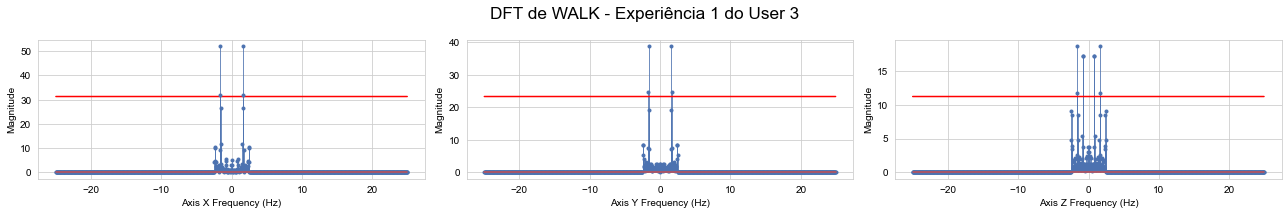

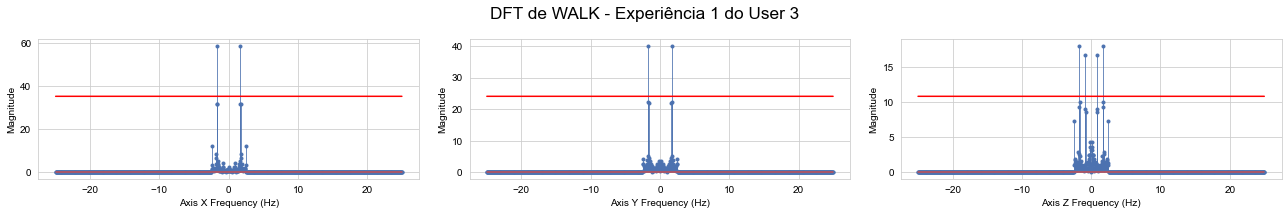

In [131]:
%matplotlib inline
for i in walks_user3_1_detrended:
    set_between_std(i)
    plot_activity_dft(i, len(i), 3, 1, "WALK", False, 0.6, 'hn', True)

user3_2
X: [1.70807453 1.75983437]
Y: [1.70807453 1.75983437]
Z: [0.82815735 0.87991718 1.70807453 1.75983437]
------------------
user3_2
X: [1.71122995]
Y: [1.65775401 1.71122995]
Z: [0.85561497 1.65775401 1.71122995]
------------------


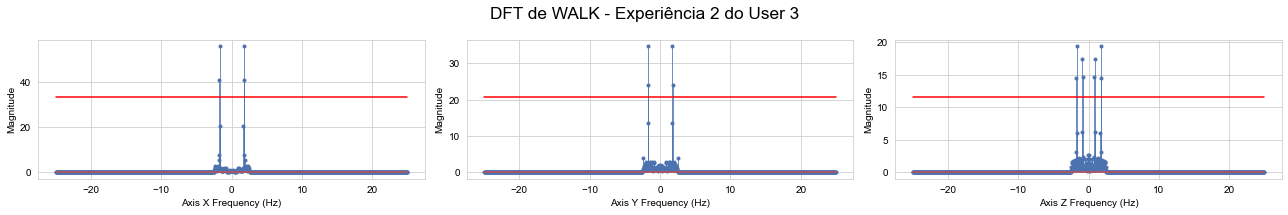

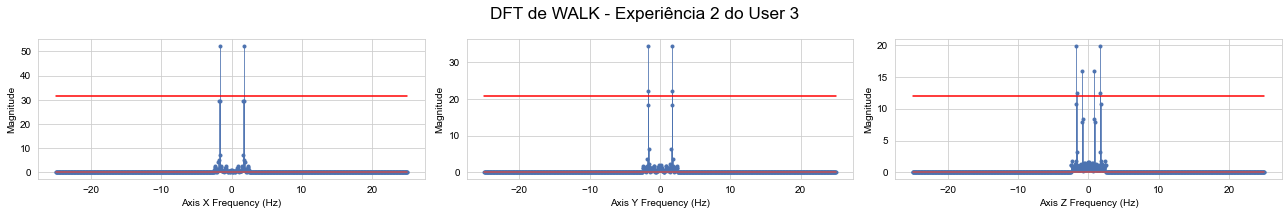

In [132]:
#%matplotlib widget
for i in walks_user3_2_detrended:
    plot_activity_dft(i, len(i), 3, 2, "WALK", False, 0.6, 'hn', True)

user4_1
X: [1.87937063 1.92307692]
Y: [1.87937063 1.92307692]
Z: [0.96153846 1.87937063 1.92307692]
------------------
user4_1
X: [1.92307692 1.97115385]
Y: [1.92307692 1.97115385]
Z: [1.92307692 1.97115385]
------------------


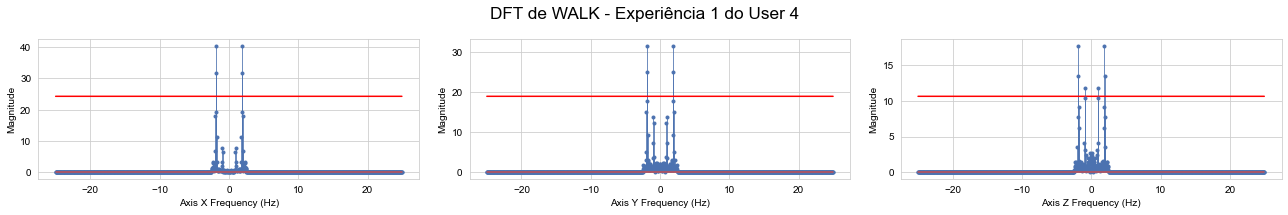

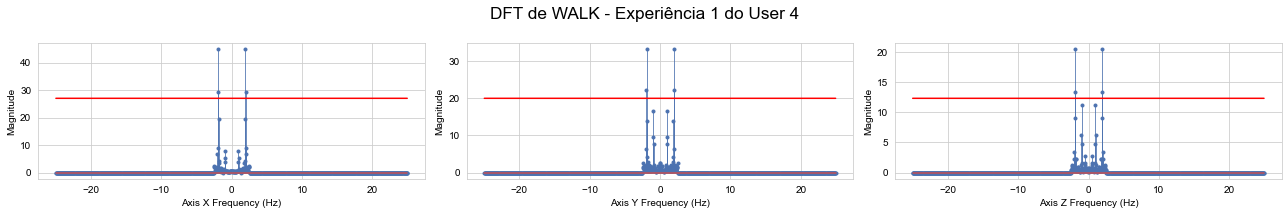

In [133]:
for i in walks_user4_1_detrended:
    plot_activity_dft(i, len(i), 4, 1, "WALK", False, 0.6, 'hn', True)

user4_2
X: [1.93423598 1.98259188]
Y: [1.93423598 1.98259188]
Z: [0.96711799]
------------------
user4_2
X: [1.95674562 2.00823893]
Y: [1.95674562 2.00823893]
Z: [0.97837281 1.02986612]
------------------


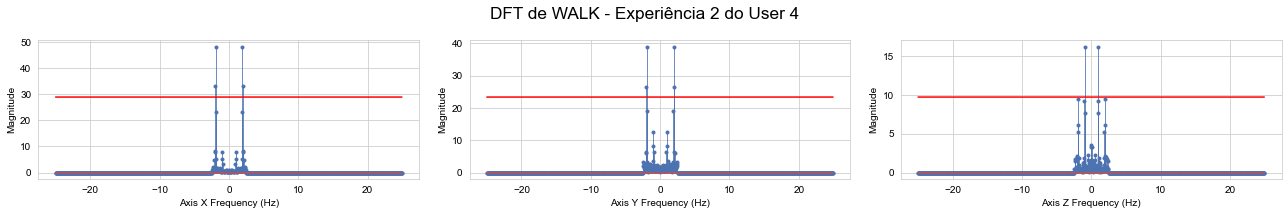

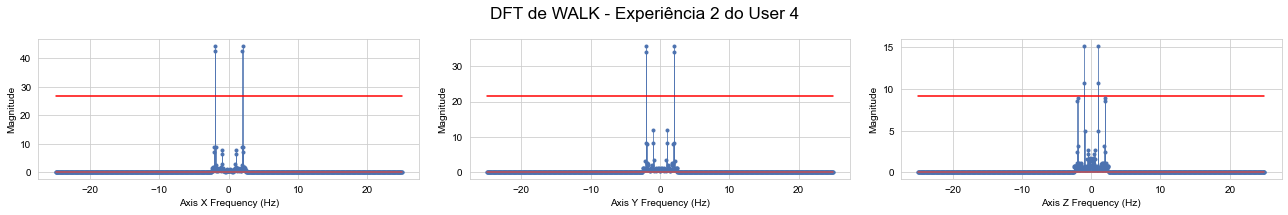

In [134]:
for i in walks_user4_2_detrended:
    plot_activity_dft(i, len(i), 4, 2, "WALK", False, 0.6, 'hn', True)

### EIXOS X WALK:
##### USER_3_EXP_1: [1.56521739, 1.60869565, 1.65217391] <----> [1.64319249, 1.69014085, 1.7370892 ]
##### USER_3_EXP_2: [1.70807453, 1.75983437] <----> [1.65775401, 1.71122995, 1.76470588]
##### USER_4_EXP_1: [1.87937063, 1.92307692] <----> [1.92307692, 1.97115385]
##### USER_4_EXP_2: [1.93423598, 1.98259188] <----> [1.95674562, 2.00823893]   
### EIXOS Y WALK:
##### USER_3_EXP_1: [1.60869565, 1.65217391] <----> [1.92307692 1.97115385]
##### USER_3_EXP_2: [1.70807453, 1.75983437] <----> [1.65775401, 1.71122995, 1.76470588]
##### USER_4_EXP_1: [1.83566434, 1.87937063, 1.92307692] <----> [1.92307692, 1.97115385]
##### USER_4_EXP_2: [1.93423598, 1.98259188] <----> [1.95674562, 2.00823893, 2.98661174]
##### 
### EIXOS Z WALK:
##### USER_3_EXP_1: [0.7826087,  0.82608696, 1.60869565, 1.65217391] <----> [0.84507042 1.64319249 1.69014085 1.7370892  2.53521127]
##### USER_3_EXP_2: [0.82815735, 0.87991718, 1.70807453, 1.75983437] <----> [0.85561497, 1.65775401, 1.71122995, 1.76470588]
##### USER_4_EXP_1: [0.91783217, 0.96153846, 1.83566434, 1.87937063, 1.92307692] <----> [0.96153846 1.92307692 1.97115385]
##### USER_4_EXP_2: [0.96711799, 1.01547389, 1.93423598] <----> [0.97837281, 1.02986612, 1.95674562, 2.00823893]

## DFT's da atividades WALK_DOWN de todos as experiências

In [ ]:
for i in walks_down_user3_1_detrended:
    plot_activity_dft(i, len(i), 3, 1, "WALK DOWN", False, 0.65, 'hn', True)

In [ ]:
for i in walks_down_user3_2_detrended:
    plot_activity_dft(i, len(i), 3, 2, "WALK DOWN", False, 0.8, 'hn', True)

In [ ]:
for i in walks_down_user4_1_detrended:
    plot_activity_dft(i, len(i), 4, 1, "WALK DOWN", False, 0.8, 'hn', True)

### EIXOS X WALK_DOWN:
##### 
##### 
### EIXOS Y WALK_DOWN:
##### 
### EIXOS Z WALK_DOWN:
##### 

In [ ]:
for i in walks_user1_1_detrended:
    plot_activity_dft(i, len(i), 4, 1, "WALK DOWN", False, 0.8, 'hn', True)